<a href="https://colab.research.google.com/github/chetan110801/CoffeeSalesAnalysis/blob/main/imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

# Assuming your file is named 'data.csv'
import pandas as pd
df = pd.read_csv("customer_churn.csv")
df.sample(5)

Saving customer_churn.csv to customer_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4557,5944-UGLLK,Male,0,No,No,53,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),54.90,3045.75,No
2281,9578-VRMNM,Female,0,No,No,16,Yes,Yes,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),65.20,1043.35,Yes
2366,1846-XWOQN,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes
3307,0253-ZTEOB,Female,0,Yes,Yes,48,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Electronic check,79.65,3870.3,No
2675,4878-BUNFV,Male,0,Yes,Yes,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.70,828.85,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

<ipython-input-7-4444e55674a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

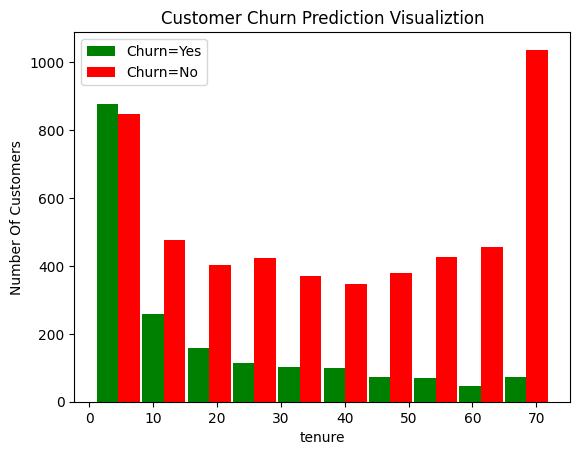

In [8]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

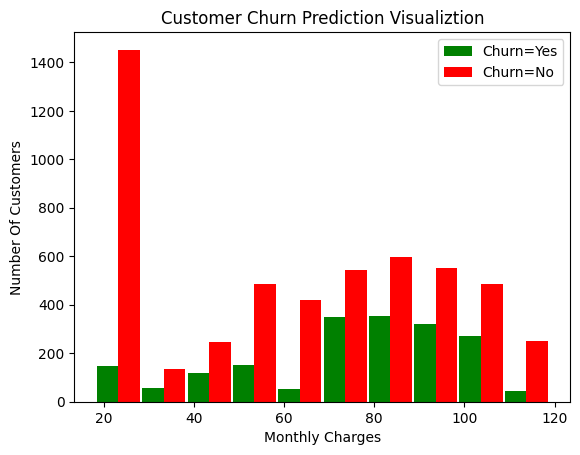

In [9]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [10]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [11]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-11-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-11-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [12]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-12-34dfac0bf179>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-12-34dfac0bf179>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-12-34dfac0bf179>:4: Set

In [13]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [14]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-14-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-14-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-14-ba15

In [15]:
df1.gender.unique()

array([1, 0])

In [16]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
# 1. Identify the boolean columns
bool_cols = df2.select_dtypes(include='bool').columns

# 2. Convert the boolean columns to integers
df2[bool_cols] = df2[bool_cols].astype(int)

In [18]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
import pandas as pd
from sklearn.utils import resample

# Separate the majority class (Churn = 0) and minority class (Churn = 1)
df_majority = df2[df2['Churn'] == 0]
df_minority = df2[df2['Churn'] == 1]

# Calculate target counts to achieve 95% majority to 5% minority ratio
desired_ratio = 0.05
target_minority_count = int(len(df_majority) * desired_ratio / (1 - desired_ratio))

# Down-sample the minority class
df_minority_downsampled = resample(df_minority,
                                   replace=False,  # sample without replacement
                                   n_samples=target_minority_count,  # target count
                                   random_state=42)  # reproducibility

# Combine the majority class with the down-sampled minority class
df_balanced = pd.concat([df_majority, df_minority_downsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
class_distribution = df_balanced['Churn'].value_counts(normalize=True) * 100
class_distribution

,proportion
Churn,
0,95.012882
1,4.987118


In [21]:
X = df_balanced.drop('Churn',axis='columns')
y = testLabels = df_balanced.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15, stratify=y)

In [22]:
y_train.value_counts()

,count
Churn,
0.0,4646
1.0,244


In [23]:
y.value_counts()

,count
Churn,
0.0,5163
1.0,271


In [24]:
y_test.value_counts()

,count
Churn,
0.0,517
1.0,27


In [25]:
X_train.shape

(4890, 26)

In [26]:
X_test.shape

(544, 26)

In [27]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2196,1,0,1,0,0.971831,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
1743,1,0,0,0,0.845070,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
905,1,0,0,0,0.126761,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1335,1,0,1,1,0.661972,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2552,0,0,0,0,0.042254,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
302,0,0,0,0,0.028169,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2034,0,0,0,0,0.084507,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5064,1,0,0,0,0.140845,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4887,1,0,1,0,0.971831,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0
396,0,0,0,0,0.323944,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [75]:
!pip install imbalance-xgboost
!pip install CatBoost
!pip install xlsxwriter  # For writing Excel files

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Libraries
from xgboost import DMatrix, train as xgb_train, XGBClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier, Dataset as lgbDataset
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,
    confusion_matrix, classification_report, make_scorer
)
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from scipy import special, optimize

from collections import Counter

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Reset the index for X_train and y_train if necessary
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define thresholds to evaluate
thresholds = [0.3, 0.4, 0.5]

# Initialize a list to store the results for each model
results = []

In [64]:
# Function to evaluate models at different thresholds
def evaluate_model_at_thresholds(y_true, y_prob, model_name):
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        accuracy = accuracy_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_prob)
        results.append({
            'Model': model_name,
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc
        })

In [65]:
# Train Standard XGBoost Model
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict class labels
y_pred = xgb_model.predict(X_test)

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard XGBoost")

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       517
         1.0       0.38      0.11      0.17        27

    accuracy                           0.95       544
   macro avg       0.67      0.55      0.57       544
weighted avg       0.93      0.95      0.93       544

Confusion Matrix:
 [[512   5]
 [ 24   3]]
ROC AUC Score: 0.7946844329823053


In [66]:
# Train Standard XGBoost Model with scale_pos_weight
# Calculate initial scale_pos_weight
counter = Counter(y_train)
initial_scale_pos_weight = counter[0.0] / counter[1.0]

# Define parameter grid for scale_pos_weight
param_grid = {
    'scale_pos_weight': [initial_scale_pos_weight * 0.5, initial_scale_pos_weight, initial_scale_pos_weight * 1.5, initial_scale_pos_weight * 2.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Use GridSearchCV to find the best scale_pos_weight
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1 score to balance precision and recall
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Best Model Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Best Model Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Best Model ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "XGBoost with scale_pos_weight")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       517
         1.0       0.20      0.22      0.21        27

    accuracy                           0.92       544
   macro avg       0.58      0.59      0.58       544
weighted avg       0.92      0.92      0.92       544

Best Model Confusion Matrix:
 [[493  24]
 [ 21   6]]
Best Model ROC AUC Score: 0.831793108388853


In [67]:
# Train Imbalance XGBoost Model
# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Initialize the imbalance XGBoost classifier with a base configuration for focal loss
xgboster_focal = imb_xgb(special_objective='focal')

# Set the parameters for grid search on focal_gamma and imbalance_alpha to increase recall for class 1
params_focal = {
    'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0],  # Higher focal gamma to focus more on the minority class
    'imbalance_alpha': [1.5, 2.0, 2.5, 3.0, 4.0]  # Different levels of imbalance handling
}

# Perform Grid Search with Cross Validation for focal loss booster
CV_focal_booster = GridSearchCV(xgboster_focal, params_focal, cv=3)
CV_focal_booster.fit(X_train_np, y_train_np)

# Best model from Grid Search with focal loss
best_focal_model = CV_focal_booster.best_estimator_

# Predict class labels using the best focal model
y_pred_focal = best_focal_model.predict(X_test_np)

# Predict outputs
y_pred_sigmoid_output = best_focal_model.predict_sigmoid(X_test_np)  # Sigmoid output
y_pred_class_output = best_focal_model.predict_determine(X_test_np)  # Class determination output
y_pred_prob_output = best_focal_model.predict_two_class(X_test_np)  # Probabilities of two classes

# Convert predictions to binary values using an appropriate threshold
threshold = 0.5  # Adjust threshold if needed to improve recall
y_pred_focal_binary = (y_pred_prob_output[:, 1] > threshold).astype(int)

# Classification report for Imbalance XGBoost model
print("Imbalance XGBoost Model - Classification Report:\n", classification_report(y_test_np, y_pred_focal_binary))

# Confusion matrix for Imbalance XGBoost model
cm_focal = confusion_matrix(y_test_np, y_pred_focal_binary)
print("Imbalance XGBoost Model - Confusion Matrix:\n", cm_focal)

# ROC AUC score
roc_auc = roc_auc_score(y_test_np, y_pred_focal_binary)
print("Best Model ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test_np, y_pred_focal_binary, "Imbalance XGBoost Model")

Imbalance XGBoost Model - Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       517
         1.0       0.50      0.07      0.13        27

    accuracy                           0.95       544
   macro avg       0.73      0.54      0.55       544
weighted avg       0.93      0.95      0.93       544

Imbalance XGBoost Model - Confusion Matrix:
 [[515   2]
 [ 25   2]]
Best Model ROC AUC Score: 0.5351028010602478


In [68]:
## Train Standard CatBoost Model
# Calculate the class weights
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
class_weights = [num_pos / num_neg, 1.0]  # Assign higher weight to the minority class (class 1)

# Initialize the CatBoost classifier with class weights
catboost_model = CatBoostClassifier(
    random_state=42,
    class_weights=class_weights) # Set class weights manually

# Train the model
catboost_model.fit(X_train, y_train)

# Predict class labels
y_pred = catboost_model.predict(X_test)

# Predict probabilities
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard CatBoost")

Learning rate set to 0.020289
0:	learn: 0.6816818	total: 10.6ms	remaining: 10.6s
1:	learn: 0.6706890	total: 19.2ms	remaining: 9.57s
2:	learn: 0.6610593	total: 28ms	remaining: 9.32s
3:	learn: 0.6515552	total: 36.7ms	remaining: 9.15s
4:	learn: 0.6417644	total: 45.5ms	remaining: 9.04s
5:	learn: 0.6330913	total: 53.6ms	remaining: 8.88s
6:	learn: 0.6225833	total: 57.7ms	remaining: 8.19s
7:	learn: 0.6146286	total: 61.7ms	remaining: 7.65s
8:	learn: 0.6072499	total: 65.9ms	remaining: 7.26s
9:	learn: 0.5999438	total: 69.7ms	remaining: 6.9s
10:	learn: 0.5931361	total: 73.3ms	remaining: 6.59s
11:	learn: 0.5850237	total: 77.1ms	remaining: 6.34s
12:	learn: 0.5783027	total: 80.6ms	remaining: 6.12s
13:	learn: 0.5725298	total: 84.3ms	remaining: 5.93s
14:	learn: 0.5650774	total: 88ms	remaining: 5.78s
15:	learn: 0.5589530	total: 91.7ms	remaining: 5.64s
16:	learn: 0.5535243	total: 95.3ms	remaining: 5.51s
17:	learn: 0.5476359	total: 99.3ms	remaining: 5.42s
18:	learn: 0.5420488	total: 103ms	remaining: 5.33

In [69]:
## Train Standard LightGBM
# Define parameters for GridSearch
params = {
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

# Optimize for F1 score
grid = GridSearchCV(LGBMClassifier(random_state=42), params, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Use the best model from Grid Search
best_model = grid.best_estimator_

# Predict class labels using the best model
y_pred = best_model.predict(X_test)

# Predict probabilities using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_proba, "Standard LightGBM")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 244, number of negative: 4646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4890, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207978 -> initscore=-1.337156
[LightGBM] [Info] Start training from score -1.337156
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       517
         1.0       0.28      0.26      0.27        27

    accuracy                           0.93       544
   macro avg       0.62      0.61      0.62       544
weighted av

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Custom Focal Loss for XGBoost
class XGBoostFocalLoss:
    def __init__(self, gamma, alpha=None):
        self.gamma = gamma
        self.alpha = alpha

    def focal_loss(self, y_true, y_pred):
        p = 1 / (1 + np.exp(-y_pred))  # Sigmoid
        grad = (p - y_true) * ((y_true * (1 - p)) ** self.gamma)
        hess = (p * (1 - p)) * (self.gamma * y_true * (1 - p)) ** (self.gamma - 1)
        return grad, hess

    def focal_loss_obj(self, y_pred, dtrain):
        y_true = dtrain.get_label()
        grad, hess = self.focal_loss(y_true, y_pred)
        return grad, hess

# Define parameter grid
param_grid = {
    'focal_gamma': [1.0, 2.0, 3.0],
    'imbalance_alpha': [1.0, 2.0, 3.0],
    'learning_rate': [0.01],
    'n_estimators': [100, 200]
}

# Create a custom grid search function
def grid_search_xgboost_focal(X_train, y_train, X_test, y_test, param_grid):
    best_score = float('inf')
    best_params = None
    for params in ParameterGrid(param_grid):
        focal_loss = XGBoostFocalLoss(gamma=params['focal_gamma'], alpha=params['imbalance_alpha'])
        xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        xgb_model.set_params(objective=focal_loss.focal_loss_obj)
        xgb_model.fit(X_train, y_train)
        y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
        # Evaluate using any metric (e.g., ROC AUC, logloss, etc.)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        if roc_auc > best_score:
            best_score = roc_auc
            best_params = params
    return best_params, best_score

# Perform grid search
best_params, best_score = grid_search_xgboost_focal(X_train, y_train, X_test, y_test, param_grid)
print(f"Best Params: {best_params}, Best ROC AUC: {best_score}")

AttributeError: 'numpy.ndarray' object has no attribute 'get_label'

In [81]:
# Custom objective for XGBoost
def focal_loss_xgb(y_pred, dtrain, gamma=2):
    y_true = dtrain.get_label()
    fl = FocalLoss(gamma=gamma)
    grad = fl.grad(y_true, special.expit(y_pred))
    hess = fl.hess(y_true, special.expit(y_pred))
    return grad, hess

# Custom evaluation metric for XGBoost
def focal_loss_xgb_eval(y_pred, dtrain, gamma=2):
    y_true = dtrain.get_label()
    fl = FocalLoss(gamma=gamma)
    loss = fl(y_true, special.expit(y_pred))
    return 'focal_loss', np.mean(loss), False

# Prepare data in DMatrix format for XGBoost
dtrain_xgb = DMatrix(X_train, label=y_train)
dtest_xgb = DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': focal_loss_xgb,
    'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train XGBoost with focal loss
xgb_model_focal = xgb_train(
    params,
    dtrain_xgb,
    num_boost_round=1000,
    early_stopping_rounds=20,
    evals=[(dtrain_xgb, 'train'), (dtest_xgb, 'eval')],
    obj=focal_loss_xgb,
    feval=focal_loss_xgb_eval,
    verbose_eval=100
)

# Predict probabilities
y_pred_focal_xgb = xgb_model_focal.predict(dtest_xgb)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_pred_focal_xgb, "XGBoost with Focal Loss")

XGBoostError: [14:26:02] /workspace/src/objective/objective.cc:31: Unknown objective function: `<function focal_loss_xgb at 0x78e2fb0571c0>`
Objective candidate: rank:ndcg
Objective candidate: rank:pairwise
Objective candidate: rank:map
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: reg:quantileerror
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:gamma
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dbbc) [0x78e31ea2dbbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x707061) [0x78e31ef07061]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5bf351) [0x78e31edbf351]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5c91eb) [0x78e31edc91eb]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterBoostedRounds+0x34) [0x78e31e935604]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x78e37fad6e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x78e37fad3493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x78e37fafc3e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x78e37fafba00]



In [85]:
from catboost import CatBoostClassifier, Pool

# Train CatBoost with Native Focal Loss (specify both gamma and alpha)
catboost_focal_model = CatBoostClassifier(
    loss_function='Focal:gamma=2,alpha=0.25',  # Specify Focal loss with gamma=2 and alpha=0.25
    eval_metric='F1',
    custom_loss=['AUC', 'Accuracy'],
    random_seed=42,
    verbose=0,
    iterations=500,
    early_stopping_rounds=10
)

# Prepare data for CatBoost
train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

# Train the model
catboost_focal_model.fit(train_pool, eval_set=eval_pool, verbose=False)

# Predict probabilities
y_prob_cat_focal = catboost_focal_model.predict_proba(X_test)[:, 1]

# Evaluate model
evaluate_model_at_thresholds(y_test, y_prob_cat_focal, "CatBoost with Custom Focal Loss")

CatBoostError: catboost/private/libs/options/catboost_options.cpp:228: Param focal_alpha is mandatory for Focal loss

In [80]:
# Define Focal Loss for LightGBM
def focal_loss_lgb(y_pred, dataset, alpha=0.25, gamma=2):
    y_true = dataset.get_label()
    p = expit(y_pred)
    grad = -(alpha * y_true * ((1 - p) ** gamma) * (1 - p - gamma * p * np.log(p + 1e-15)) +
             (1 - alpha) * (1 - y_true) * (p ** gamma) * (p - gamma * (1 - p) * np.log(1 - p + 1e-15)))
    hess = (alpha * y_true * ((1 - p) ** gamma) * (gamma * p * (2 * p - 1) + (1 - p)) +
            (1 - alpha) * (1 - y_true) * (p ** gamma) * (gamma * (1 - p) * (2 * p - 1) + p))
    return grad, hess

def focal_loss_lgb_eval_error(y_pred, dataset, alpha=0.25, gamma=2):
    y_true = dataset.get_label()
    p = expit(y_pred)
    loss = -(alpha * y_true * ((1 - p) ** gamma) * np.log(p + 1e-15) +
             (1 - alpha) * (1 - y_true) * (p ** gamma) * np.log(1 - p + 1e-15))
    return 'focal_loss', np.mean(loss), False  # False indicates lower is better

# Prepare data for LightGBM
train_data_lgb = lgb.Dataset(X_train, label=y_train)
valid_data_lgb = lgb.Dataset(X_test, label=y_test)

# Train LightGBM with custom focal loss
params_lgb = {'learning_rate': 0.1, 'random_state': 42}

lgb_focal_model = lgb.train(
    params_lgb,
    train_data_lgb,
    num_boost_round=200,
    valid_sets=[valid_data_lgb],
    fobj=lambda y_pred, dataset: focal_loss_lgb(y_pred, dataset, alpha=0.25, gamma=2),
    feval=lambda y_pred, dataset: focal_loss_lgb_eval_error(y_pred, dataset, alpha=0.25, gamma=2),
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict probabilities
y_pred_lgb_focal = lgb_focal_model.predict(X_test)
y_prob_lgb_focal = expit(y_pred_lgb_focal)

# Evaluate model
evaluate_model_at_thresholds(y_test, y_prob_lgb_focal, "LightGBM with Custom Focal Loss")

TypeError: train() got an unexpected keyword argument 'fobj'

In [74]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Pivot the DataFrame for better readability
df_pivot = df_results.pivot_table(
    index=['Model', 'Threshold'],
    values=['Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC AUC']
).reset_index()

# Display the results
print(df_pivot)

# Save the results to an Excel file
df_pivot.to_excel('model_comparison_results.xlsx', index=False)

# Download the file in Google Colab
files.download('model_comparison_results.xlsx')

                            Model  Threshold  Accuracy  F1 Score  Precision  \
0         Imbalance XGBoost Model        0.3  0.950368  0.129032   0.500000   
1         Imbalance XGBoost Model        0.4  0.950368  0.129032   0.500000   
2         Imbalance XGBoost Model        0.5  0.950368  0.129032   0.500000   
3               Standard CatBoost        0.3  0.845588  0.275862   0.179775   
4               Standard CatBoost        0.4  0.875000  0.260870   0.184615   
5               Standard CatBoost        0.5  0.891544  0.271605   0.203704   
6               Standard LightGBM        0.3  0.904412  0.297297   0.234043   
7               Standard LightGBM        0.4  0.917279  0.262295   0.235294   
8               Standard LightGBM        0.5  0.930147  0.269231   0.280000   
9                Standard XGBoost        0.3  0.935662  0.186047   0.250000   
10               Standard XGBoost        0.4  0.937500  0.150000   0.230769   
11               Standard XGBoost        0.5  0.9466

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>